In [49]:
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers

In [50]:
sample = pd.read_csv('sample_submission.csv')
sample.head()

,id_img,label
0,18341,sadness
1,13176,sadness
2,23945,happy
3,15968,happy
4,18382,happy


In [51]:
train = pd.read_csv('train_set.csv')
train.tail()

,label,id_img,path
6171,sadness,11346,sadness/11346.jpg
6172,sadness,4441,sadness/04441.jpg
6173,sadness,15236,sadness/15236.jpg
6174,sadness,27361,sadness/27361.jpg
6175,sadness,25239,sadness/25239.jpg


In [52]:
test = pd.read_csv('test_set.csv')
test.head()

,id_img,path
0,18341,test/18341.jpg
1,13176,test/13176.jpg
2,23945,test/23945.jpg
3,15968,test/15968.jpg
4,18382,test/18382.jpg


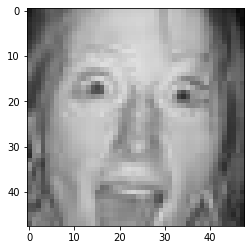

In [53]:
# example
img = cv2.imread('train/happy/22373.jpg')
plt.imshow(img)

In [65]:
# Loading training data
train_images = np.zeros((len(train['path']), 48, 48, 3), dtype='uint8')
train_labels = np.array(train['label'])
# Mapping the lables to numbers
le = LabelEncoder()
train_labels = le.fit_transform(train_labels)
for i in range(len(train['path'])):
    train_images[i] = cv2.imread('train/' + train['path'][i])

In [55]:
print(train_images.shape)
print(train_labels.shape)

(6176, 48, 48, 3)
(6176,)


In [56]:
# Shuffle training data to switch order
train_images, train_labels = shuffle(train_images, train_labels, random_state= 12)

In [57]:
# Loading the test data
test_images = np.zeros((len(test['path']), 48, 48, 3), dtype='uint8')
for i in range(len(test['path'])):
    test_images[i] = cv2.imread(test['path'][i])

In [58]:
print(test_images.shape)

(4117, 48, 48, 3)


In [59]:
# Building a model
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(filters=8, 
                        kernel_size=(3, 3), 
                        input_shape=(48, 48, 3), 
                        padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 48, 48, 8)         224       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 8)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 8)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                147488    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 148,042
Trainable params: 148,042
Non-trainable params: 0
________________________________________________

In [60]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [61]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
193/193 [==============================] - 5s 23ms/step - loss: 37.4373 - accuracy: 0.5116
Epoch 2/20
193/193 [==============================] - 4s 22ms/step - loss: 2.0049 - accuracy: 0.6249
Epoch 3/20
193/193 [==============================] - 5s 29ms/step - loss: 0.9740 - accuracy: 0.6776
Epoch 4/20
193/193 [==============================] - 5s 28ms/step - loss: 0.7133 - accuracy: 0.6815
Epoch 5/20
193/193 [==============================] - 5s 28ms/step - loss: 0.5945 - accuracy: 0.6893
Epoch 6/20
193/193 [==============================] - 5s 28ms/step - loss: 0.5747 - accuracy: 0.6984
Epoch 7/20
193/193 [==============================] - 5s 28ms/step - loss: 0.5378 - accuracy: 0.7243
Epoch 8/20
193/193 [==============================] - 6s 30ms/step - loss: 0.5005 - accuracy: 0.7450
Epoch 9/20
193/193 [==============================] - 6s 31ms/step - loss: 0.4954 - accuracy: 0.7532
Epoch 10/20
193/193 [==============================] - 5s 26ms/step - loss: 0.4868 - accur

In [62]:
predictions = model.predict_classes(test_images)

In [63]:
predictions.shape

(4117,)

In [67]:
predictions_strings = le.inverse_transform(predictions)

In [70]:
results_df = pd.DataFrame({'id_img': test['id_img'], 'label': predictions_strings})
results_df

,id_img,label
0,18341,sadness
1,13176,sadness
2,23945,sadness
3,15968,happy
4,18382,happy
...,...,...
4112,8966,happy
4113,12111,sadness
4114,16629,happy
4115,24322,happy


In [74]:
results_df.to_csv('Results_Alfon.csv', index=False)

In [75]:
pd.read_csv('Results_Alfon.csv')

,id_img,label
0,18341,sadness
1,13176,sadness
2,23945,sadness
3,15968,happy
4,18382,happy
...,...,...
4112,8966,happy
4113,12111,sadness
4114,16629,happy
4115,24322,happy
